# **Veri Setini Tanıyalım**

Fashion-MNIST veri seti 60.000 adeti Eğitim seti için 10.000 adette Test setinden oluşmaktadır. Toplam 10 farklı nesne vardır.

Her resmin 28x28 (Yükselik*Genişlik) piksel geniliğinde olup toplam 784 pikseldir. Her pikselin değeri 0-255 arasında bir sayıdır. Her biri bir rengi ifade eder.

Amacımız bu nesneleri tanımak

Etiketler :

0- Tişört

1- Pantolon

2- Kazak

3- Elbise

4- Ceket

5- Sandalet

6- Gömlek

7- Spor Ayakkabı

8- Çanta

9- Bilek Boyunda Bot

# **Kütüphanelerin Yüklenmesi**

In [2]:
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import pandas as pd
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Flatten,Dropout,BatchNormalization,Dropout
from matplotlib import image
from keras.models import Sequential,Model
from keras.preprocessing import image

# **Veri Setinin Yüklenmesi**

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# 60k Veri Eğitim İçin Kullanılacak
x_train.shape

(60000, 28, 28)

In [5]:
# 10k Veri Test İçin Kullanılacak
x_test.shape

(10000, 28, 28)

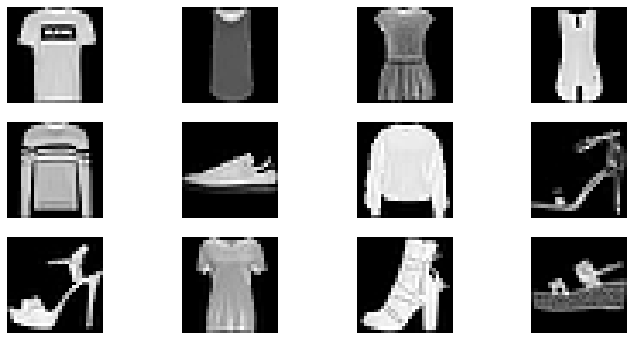

In [6]:
# Axisleri Kapatarak Örnek Resimleri Gösterdim
plt.figure(0,figsize=(12,6))
for i in range(1,13):
  #i.ninci indeksteki resime çizdir
  plt.subplot(3,4,i)
  # eksenler kapalı
  plt.axis('off')

  img=x_train[i].reshape(28,28)
  plt.imshow(img,cmap='gray')

# **ONE HOT ENCODER İşleminin Yapılması**

In [9]:
train_labels_flat = y_train
train_labels_count=np.unique(train_labels_flat).shape[0]
# 10 Nesne Var
print(train_labels_count)

10


In [10]:
# Derin Öğrenme İle Tahmin Edeceğimiz İçin y_train Değerlerimizi 0-1 Dönüştürmemiz Lazım
def labels_to_one_hot(labels_dense,num_classes):
  num_labels=labels_dense.shape[0]
  index_offset=np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels,num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] =1
  return labels_one_hot


In [11]:
y_train= labels_to_one_hot(train_labels_flat , train_labels_count)
y_train= y_train.astype(np.uint8)
pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


In [13]:
#  Derin Öğrenme İle Tahmin Edeceğimiz İçin y_test Değerlerimizi 0-1 Dönüştürmemiz Lazım
test_labels_flat = y_test
test_labels_count=np.unique(test_labels_flat).shape[0]
print(test_labels_count)

10


In [14]:
y_test= labels_to_one_hot(test_labels_flat , test_labels_count)
y_test= y_test.astype(np.uint8)
pd.DataFrame(y_test)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,1
9996,0,1,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,1,0
9998,0,1,0,0,0,0,0,0,0,0


# **Modelin Oluşturulması**

In [15]:
# Derin Ağımızda Katman Oluşturmak İçin Kerasın Sequential Modelini Kullanacaz
model= Sequential()

# 1.Katman Filtreleme (Convolutional )
# channel= ÖnceYükselik,Genişlik,Kanal  (Renk Sayısı) bilgisi olacak
# 3 RGB (RED,GREEN,BLUE)
model.add(Conv2D(64,3, data_format='channels_last',kernel_initializer="he_normal",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2.Katman
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2)) #strides = Adım aralığı 2 şer atlayacak
# Aşırı Öğrenme Önlemek İçin, % 60 Unutma İşlemi (Nöron Silme - Dropout)
model.add(Dropout(0.6)) 

# 3. Katman
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4. Katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5.Katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2)) #strride = Adım aralığı 2 şer atlayacak
model.add(Dropout(0.6)) 
 
# Tam Bağlantı Katmanı (Düzleştirme Yaptık--Flatten)
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6)) # %60 Unutma İşlemi (Nöron Silme - Dropout)


# Çıkış Katmanı
# Sınıflandırmada 10 Adet Nesne Var
model.add(Dense(10))
model.add(Activation('softmax')) # Sınıflandırıcı yapabileceğim aktivasyon

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# MODELİN ÖZETİNİ GÖRME
# Params, Katmanlarda Öğrenilen Parametre Sayısını İfade Eder
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 24, 24, 64)        0

In [16]:
# Oluşan Güncel Durumda ki Resimleri (x_train,x_test) bağımsız değişkenlere atadık
x_train =x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(f"Bağımsız Train Değeri: {x_train.shape}\nBağımsız Test Değeri: {x_test.shape}")

Bağımsız Train Değeri: (60000, 28, 28, 1)
Bağımsız Test Değeri: (10000, 28, 28, 1)


In [17]:
# Bağımlı Değerler
print(f"Bağımlı Train Değeri: {y_train.shape}\nBağımlı Test Değeri: {y_test.shape}")

Bağımlı Train Değeri: (60000, 10)
Bağımlı Test Değeri: (10000, 10)


# **Modelin Eğitilmesi**

In [18]:
epochs=40
# Veri Seinin Paketler Halinde Eğitiyor // 600 Resmi Paket (Küme) Şeklinde Eğitecek
# 60.000 / 100 = 600
batchSize=100

# Modelin Çalıştırılması
hist=model.fit(x_train,y_train,
               epochs=epochs,
               shuffle=True, # Karışık Şekilde Görselleri Alır
               batch_size=batchSize,
               validation_data=(x_test,y_test)) # Doğrulama İşlemi Yaptık

Epoch 1/40
600/600 [==============================] - 18s 14ms/step - loss: 1.0099 - accuracy: 0.6357 - val_loss: 0.5542 - val_accuracy: 0.7823
Epoch 2/40
600/600 [==============================] - 7s 12ms/step - loss: 0.6007 - accuracy: 0.7776 - val_loss: 0.4356 - val_accuracy: 0.8288
Epoch 3/40
600/600 [==============================] - 7s 12ms/step - loss: 0.5124 - accuracy: 0.8141 - val_loss: 0.3798 - val_accuracy: 0.8632
Epoch 4/40
600/600 [==============================] - 7s 12ms/step - loss: 0.4652 - accuracy: 0.8324 - val_loss: 0.3519 - val_accuracy: 0.8716
Epoch 5/40
600/600 [==============================] - 8s 13ms/step - loss: 0.4285 - accuracy: 0.8483 - val_loss: 0.3242 - val_accuracy: 0.8784
Epoch 6/40
600/600 [==============================] - 7s 12ms/step - loss: 0.4060 - accuracy: 0.8573 - val_loss: 0.2920 - val_accuracy: 0.8926
Epoch 7/40
600/600 [==============================] - 7s 12ms/step - loss: 0.3815 - accuracy: 0.8664 - val_loss: 0.3054 - val_accuracy: 0.889

# **Sonucun Görselleştirilmesi**

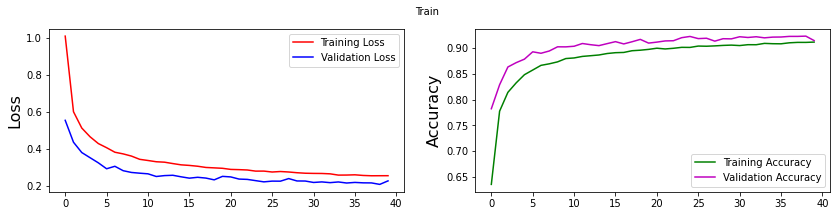

In [20]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle('Train',fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(hist.history['loss'],color='r',label='Training Loss')
plt.plot(hist.history['val_loss'],color='b',label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(hist.history['accuracy'],color='g',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='m',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Başarı Oranım %91**

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2264 - accuracy: 0.9144


[0.2264484167098999, 0.9143999814987183]

# **Rastegele Seçtiğim Bir Resmin Başarısını Ölçtüm**


In [38]:
predict_result = model.predict(x_test[40].reshape(1,28,28))
predict_result

array([[5.9673771e-02, 6.6179194e-07, 5.0764826e-05, 5.8439490e-04,
        2.3721684e-04, 1.5946911e-08, 9.3945229e-01, 8.8102792e-10,
        8.3707982e-07, 7.9150997e-09]], dtype=float32)

In [39]:
# Yukarıda Yazmış Olduğumuz Tahmin Edilen Sınıfı Buldu (0...9 )
predicted_class = predict_result.argmax()
# Bulununan Nesnenin Doğruluğu Tahmin Edildi
predicted_probability = predict_result.max()

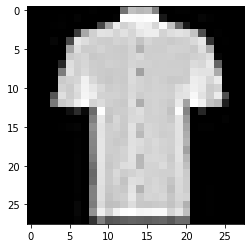

In [40]:
img=x_test[40].reshape(28,28)
plt.imshow(img,cmap='gray')

In [41]:
# 152 Nolu nesnenin Tahmin Olasılığı %98
print(f" Seçilen resmin {predicted_class} nolu nesneye ait olma olasılığı % {predicted_probability} ")

 Seçilen resmin 6 nolu nesneye ait olma olasılığı % 0.9394522905349731 
